In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# Cargar los datos de cada subcarpeta SC en un DataFrame
datos = pd.DataFrame()
for carpeta in Path('.').glob('SC*'):
    # revisar si la carpeta contiene "z-Rend.txt"
    if not (carpeta / 'z-Rend.txt').exists():
        continue
    archivo = carpeta / 'tb_future_prediccion.txt'
    df = pd.read_csv(archivo, sep='\t')
    
    # Verificar que foto_mes sea 202109, si no es así, no agregar los datos
    if df.foto_mes.unique() != [202109]:
        continue    
    # Quitar las columnas que comienzan con m_ (esto es cuando hicimos Semillerio)
    df = df.loc[:, ~df.columns.str.startswith('m_')]
    # Quitar las columnas de foto_mes y clase_ternaria
    df = df.drop(columns=['foto_mes', 'clase_ternaria'])    
    # Agregar los datos al DataFrame principal uniendo por numero de cliente
    if datos.empty:
        datos = df
    else:
        datos = datos.merge(df, on='numero_de_cliente', how='outer', suffixes=('', f'_{carpeta.name}'))
        

In [3]:
datos

,numero_de_cliente,sem_1_1,sem_1_2,sem_1_1_SC-0002,sem_1_2_SC-0002,sem_1_1_SC-0003,sem_1_2_SC-0003,sem_1_1_SC-0004,sem_1_2_SC-0004,sem_1_1_SC-0005,sem_1_2_SC-0005,sem_1_1_SC-0006,sem_1_2_SC-0006,sem_1_1_SC-0008,sem_1_2_SC-0008,sem_1_3,sem_1_4,sem_1_5
0,249221109,0.005782,0.007394,0.033203,0.039731,0.002362,0.002672,0.012041,0.008299,0.002048,0.001965,0.001592,0.001569,0.027841,0.024406,0.028883,0.029634,0.026337
1,249221468,0.023335,0.035837,0.029566,0.030411,0.011608,0.009981,0.006621,0.008142,0.001335,0.001264,0.001591,0.001543,0.044356,0.038324,0.032807,0.044637,0.037931
2,249223005,0.000534,0.000799,0.004131,0.004652,0.000293,0.000424,0.000730,0.000543,0.000215,0.000212,0.000215,0.000208,0.003320,0.003485,0.002677,0.002619,0.003223
3,249232117,0.008395,0.008067,0.028559,0.029864,0.002292,0.002973,0.004623,0.004244,0.000850,0.000835,0.000978,0.000985,0.016071,0.016448,0.014024,0.014520,0.016717
4,249236712,0.001259,0.001438,0.008016,0.007454,0.001023,0.000989,0.001230,0.000953,0.000307,0.000347,0.000398,0.000453,0.006281,0.006009,0.005310,0.006634,0.007212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165639,1606470344,0.130646,0.109961,0.102381,0.108940,0.024539,0.021065,0.022041,0.017370,0.003984,0.004017,0.004421,0.003753,0.097501,0.105404,0.105831,0.112183,0.106604
165640,1606478730,0.189464,0.187073,0.154288,0.164677,0.050235,0.044729,0.056240,0.039951,0.010321,0.009208,0.010358,0.007737,0.230843,0.215258,0.216257,0.214544,0.223663
165641,1606600592,0.060771,0.061535,0.091743,0.085992,0.012715,0.012007,0.013005,0.012510,0.002784,0.002782,0.002584,0.002324,0.046083,0.046568,0.050486,0.049032,0.043300
165642,1606610942,0.217513,0.214500,0.169343,0.163364,0.043903,0.041126,0.043255,0.043342,0.009783,0.009206,0.011684,0.009848,0.159711,0.158333,0.163284,0.157562,0.162376


In [4]:
# Calculamos la proba final promediando
datos['proba'] = datos.filter(like='sem_').mean(axis=1)

# Ordenamos por probabilidad descendente
datos = datos.sort_values('proba', ascending=False)

In [5]:
for envios in range(9500, 13501, 500):
    print(f'Envios: {envios}')
    # Creamos la columna predicted con 1 para los primeros envios y 0 para el resto
    datos['Predicted'] = 0
    datos.loc[datos.index[:envios], 'Predicted'] = 1
    print(datos.Predicted.value_counts()[1])
    
    # Guardamos el archivo para Kaggle
    datos[['numero_de_cliente', 'Predicted']].to_csv(f'KA-X_avg_7modelos_{envios}.csv', index=False)

Envios: 9500
9500
Envios: 10000
10000
Envios: 10500
10500
Envios: 11000
11000
Envios: 11500
11500
Envios: 12000
12000
Envios: 12500
12500
Envios: 13000
13000
Envios: 13500
13500


In [1]:
import pandas as pd

In [8]:
data = pd.read_csv('scores.csv')

In [9]:
data

,Nombre,Corte,Ganancia
0,KA-X_avg_6modelos,13500,129067
1,KA-X_avg_6modelos,13000,130257
2,KA-X_avg_6modelos,12500,130537
3,KA-X_avg_6modelos,12000,133757
4,KA-X_avg_6modelos,11500,131867
...,...,...,...
73,KA-0002_01_012_r1,12000,121928
74,KA-0002_01_012_r1,11500,125707
75,KA-0002_01_012_r1,11000,125987
76,KA-0002_01_012_r1,10500,129487


In [13]:
# Eliminar el ultimo registro
data = data.drop(data.index[-1])

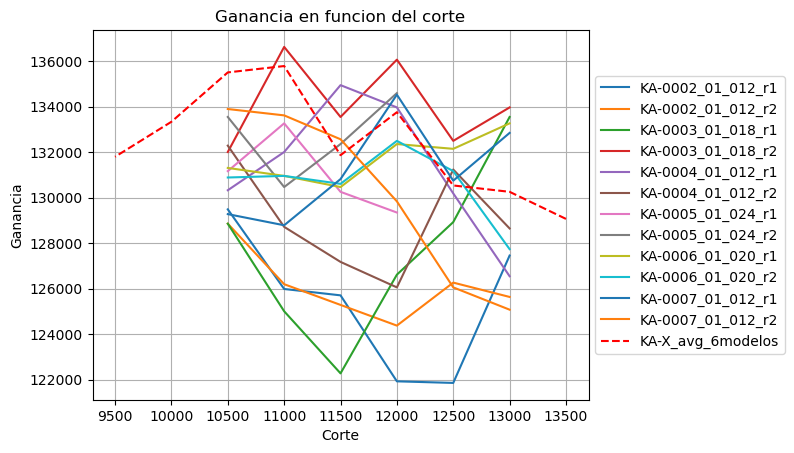

In [17]:
# Graficar la ganancia en funcion del corte, por modelo segun Nombre
import matplotlib.pyplot as plt

for nombre, df in data.groupby('Nombre'):
    # Si el nombre es KA-X_avg_6modelos colorear diferente
    if 'KA-X_avg_6modelos' in nombre:
        plt.plot(df.Corte, df.Ganancia, label=nombre, color='r', linestyle='--')
    else:
        plt.plot(df.Corte, df.Ganancia, label=nombre)
    
    # Leyenda afuera
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('Corte')
    plt.ylabel('Ganancia')
    plt.title('Ganancia en funcion del corte')
    plt.grid()
    
plt.show()